# Produce grid of monthly Pb fields

In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import pickle
import matplotlib

%matplotlib inline

#### Parameters:

In [2]:
# domain dimensions:
jmin, jmax = 159, 799
imin, imax = 1139, 2179

# Resolution of grid cells to show in figure:
grid_reso  = 10

# Rimwidths:
rimwidthN  = 10
rimwidthS  = 10
rimwidthW  = 10
rimwidthE  = 20

# Boundary coordinates: (i1,i2,j1,j2)
bdy_NCB = (1598,2177,777,797) # Northern Canada Basin
bdy_WCB = (2167,2177,390,797) # Western Canada Basin
bdy_LS  = (1140,1150,446,672) # Baffin Bay
bdy_HB  = (1190,1472,291,301) # Hudson Bay
land_color  = '#a9a7a2'

#### Load files:

In [3]:
mfile    = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mask_Pb-20220317.nc')
mesh_lon = np.array(mfile.variables['nav_lon'])
mesh_lat = np.array(mfile.variables['nav_lat'])
mask     = np.array(mfile.variables['tmask'][0])
mesh_bathy   = np.array(mfile.variables['tmask'][0,:,:,:])
bathy_masked = np.ma.masked_where((mesh_bathy> 0.1), mesh_bathy)
mesh_depth   = np.array(mfile.variables['nav_lev'])

#### Functions

In [11]:
def plot_layer(ax, variable, layer, vmin=0, vmax=30, month=''):
    
    
    CB = proj1.pcolormesh(x, y, variable[layer,:,:]*1e12, cmap=cmocean.cm.thermal, vmin=vmin, vmax=vmax, ax=ax) 
   
    proj1.contourf(x, y, bathy_masked[layer,imin:imax,jmin:jmax], colors=[land_color], zorder=2, ax=ax) # Mask land at particular depth

    ax.set_title(f'{month}', fontsize=6)
    return CB

#### Figure:

In [12]:
month_list = ['Jan.','Feb.','Mar.','Apr.','May','June','July', 'Aug.', 'Sep.','Oct.','Nov.', 'Dec.']

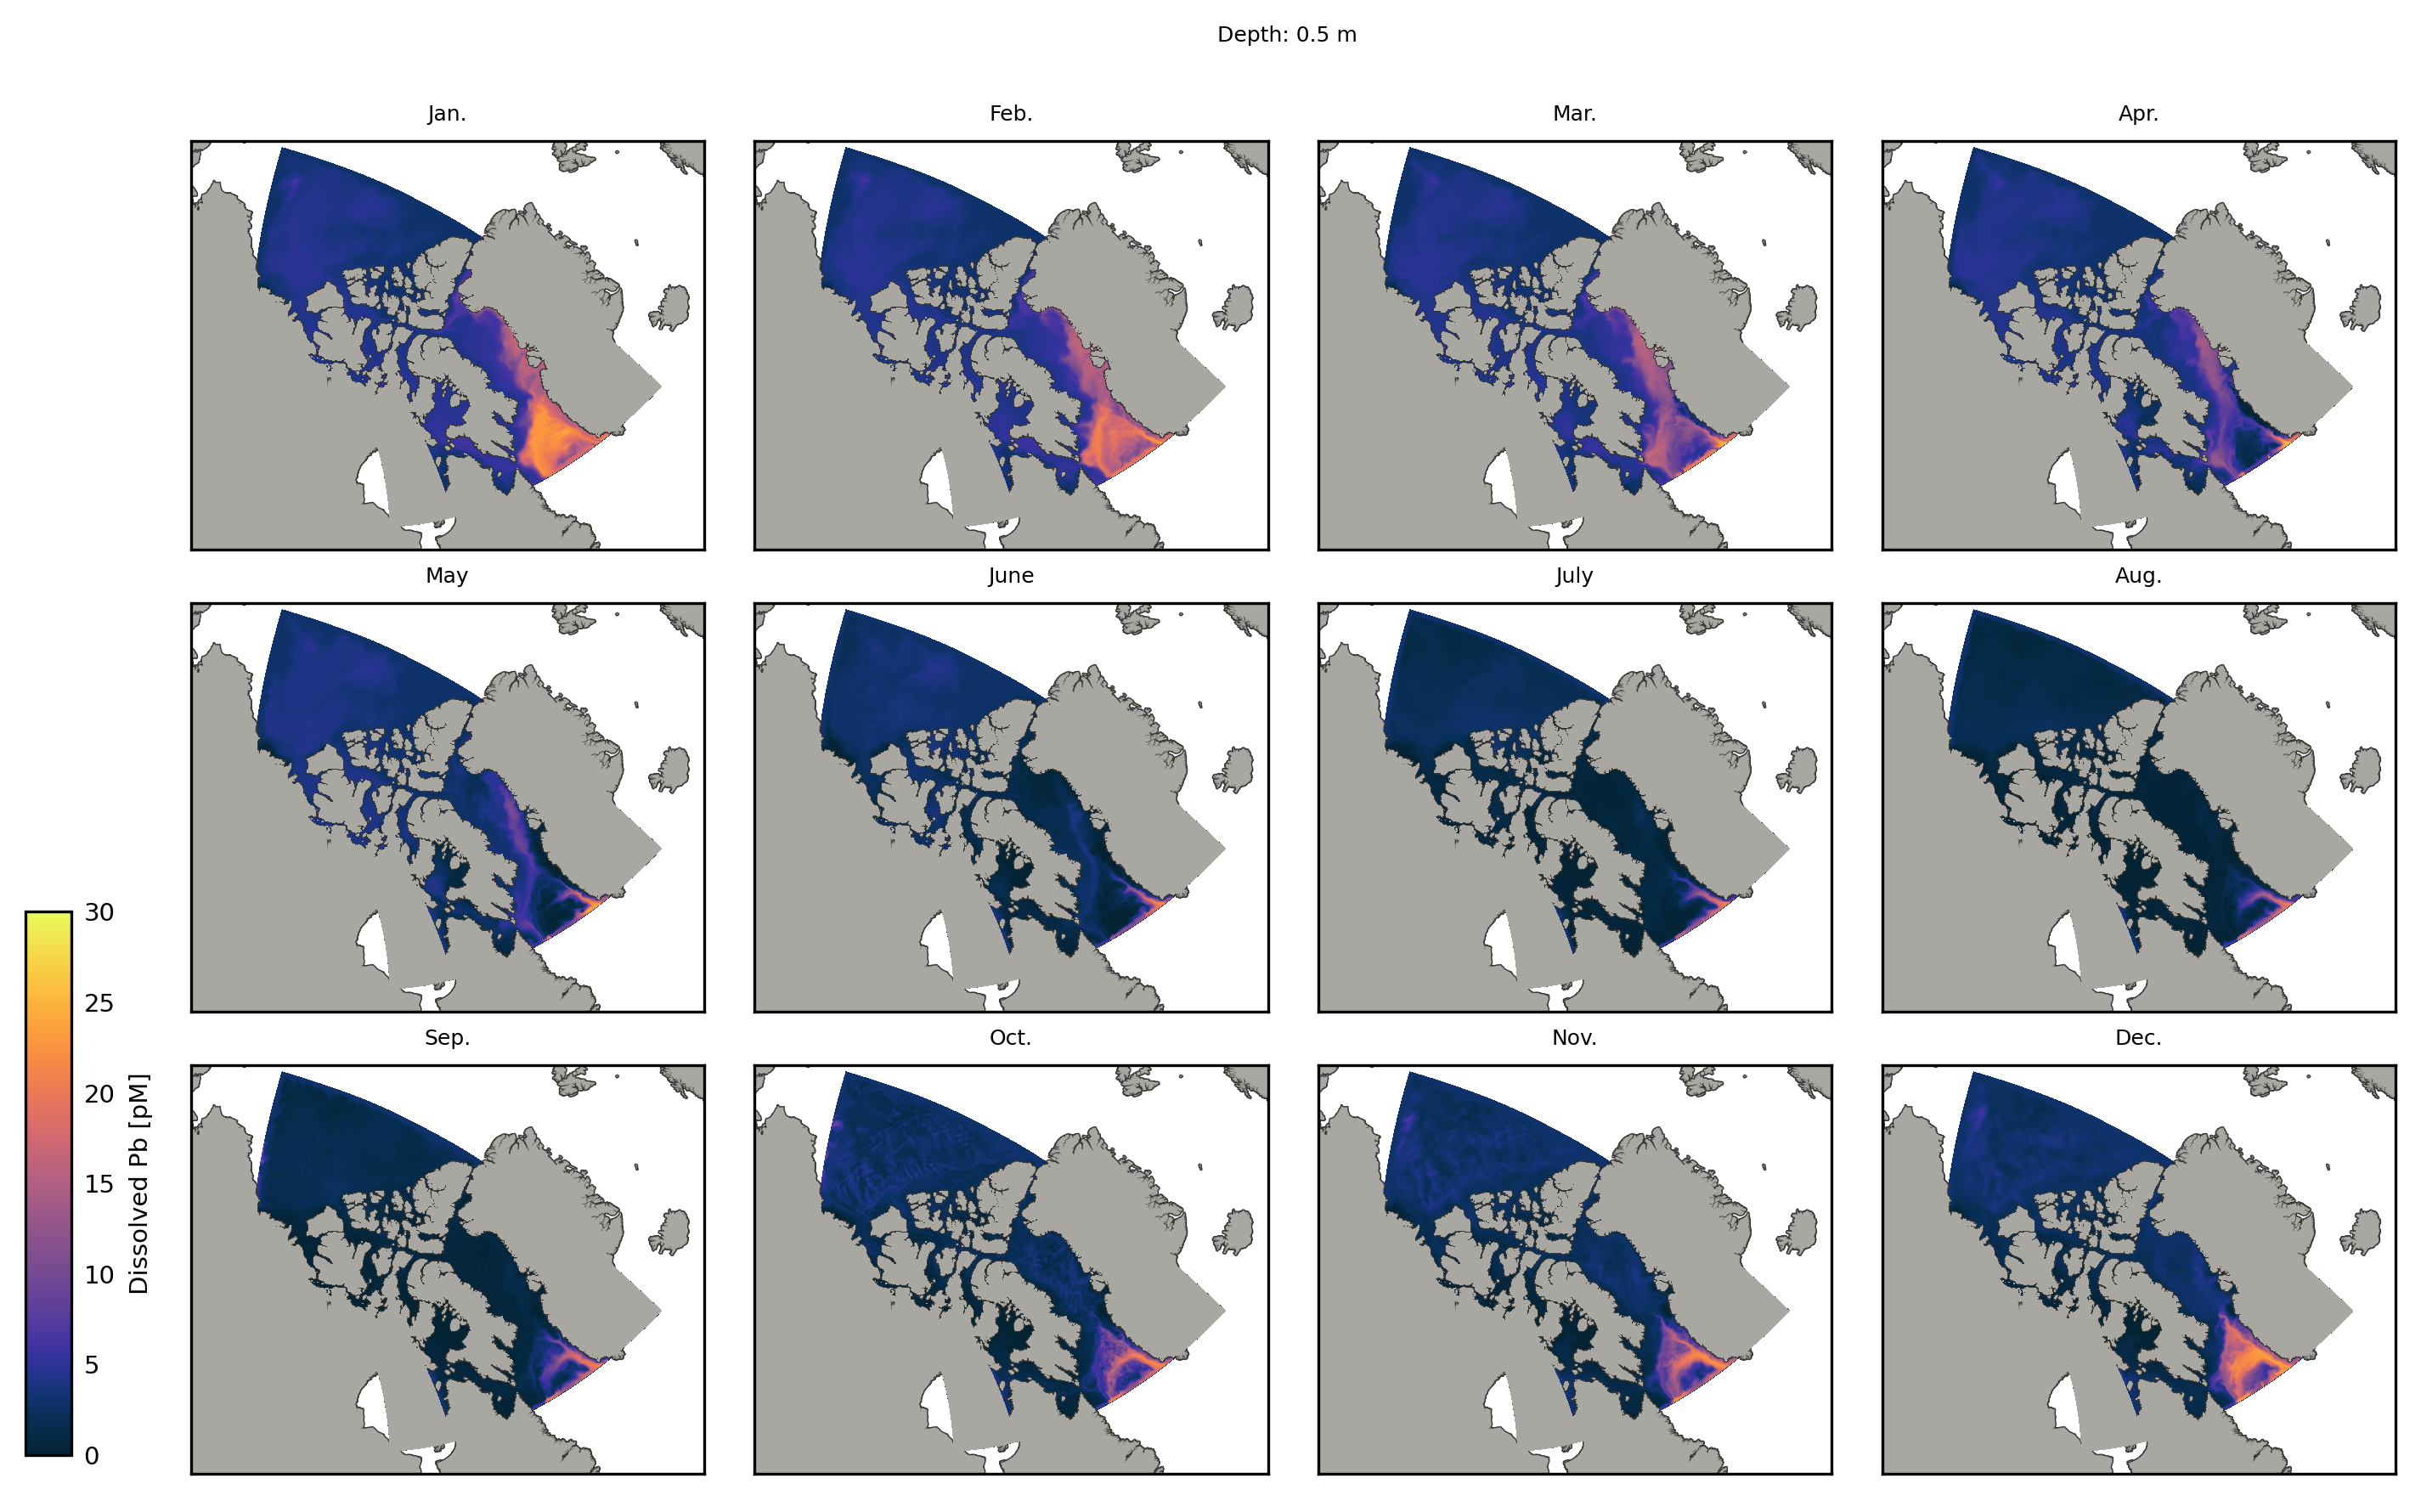

In [14]:
year   = 2002
layer  = 0

fig, ax, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/Pb12.pickle','rb'))
x, y = proj1(mesh_lon[imin:imax,jmin:jmax], mesh_lat[imin:imax,jmin:jmax]) 

for month in range(1,13):
    folder = '/data/brogalla/run_storage/Pb-tuning-202302/Pb-tuning-202302-2002-scav-fpop/'
    comp   = nc.Dataset(f'{folder}ANHA12_EXH006_1m_{year}0101_{year}1231_comp_{year}{month:02}-{year}{month:02}.nc')
    dpb    = np.array(comp.variables['dissolpb'])[0,:,:,:]
    CB = plot_layer(ax.ravel()[month-1], dpb, layer, vmin=0, vmax=30, month=month_list[month-1])
  
fig.suptitle(f'Depth: {mesh_depth[layer]:.1f} m', fontsize=6, y=1.05)

# Color bar: --------------------------------------------------------------------------------
cbaxes = fig.add_axes([-0.05, 0.05, 0.02, 0.38]);
CBar   = plt.colorbar(CB, cax=cbaxes); 
CBar.set_label('Dissolved Pb [pM]', fontsize=7)
CBar.ax.tick_params(axis='y', length=0, labelsize=7)